In [124]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam # adam 의 러닝레이트를 바꾸기 위해서는
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist

import random

In [67]:
matplotlib_inline.backend_inline.set_matplotlib_formats("retina") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

#### 초창기 신경망 (퍼셉트론)
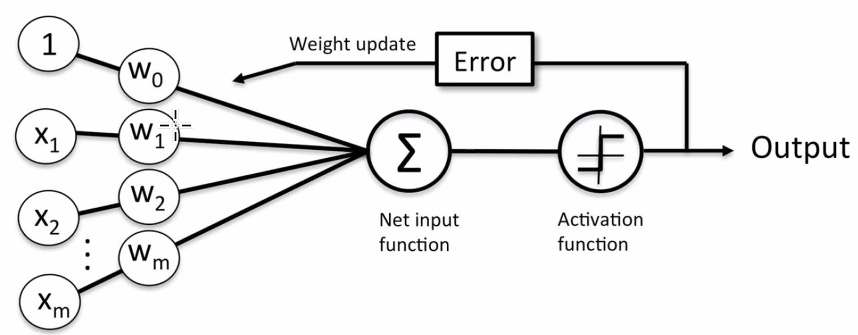

### 다층의 학습과정
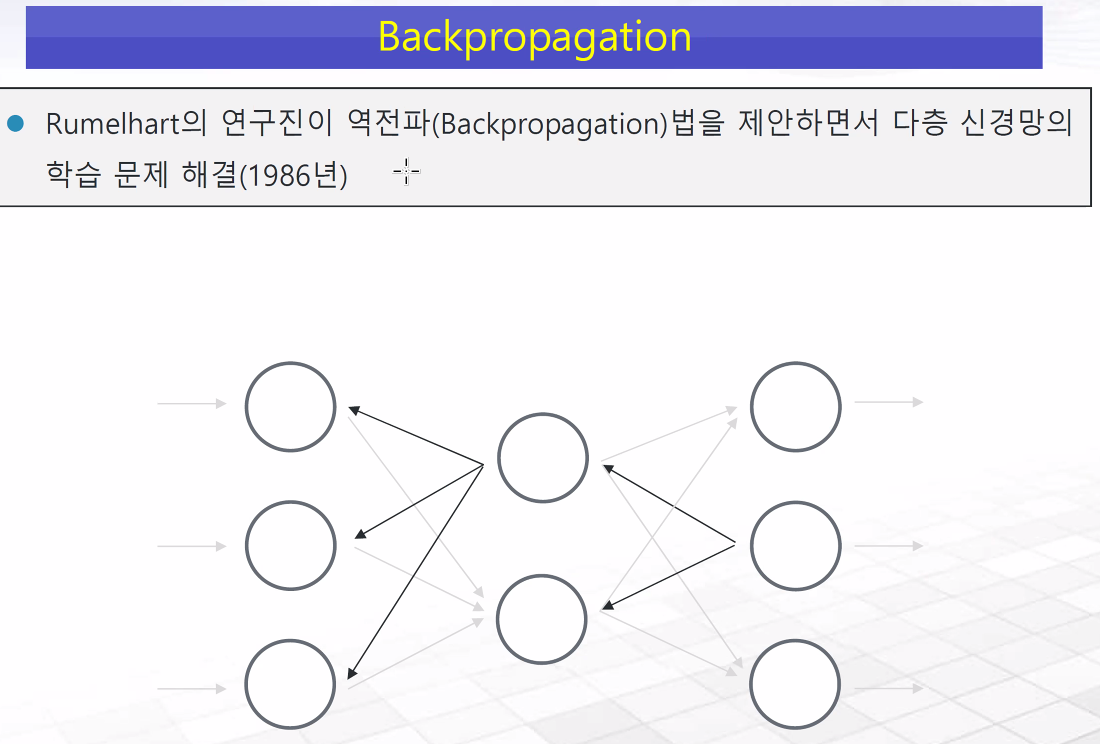

### 역전파 알고리즘 은닉층에서의 그레디언트 소실때문에 생긴게 ReLU
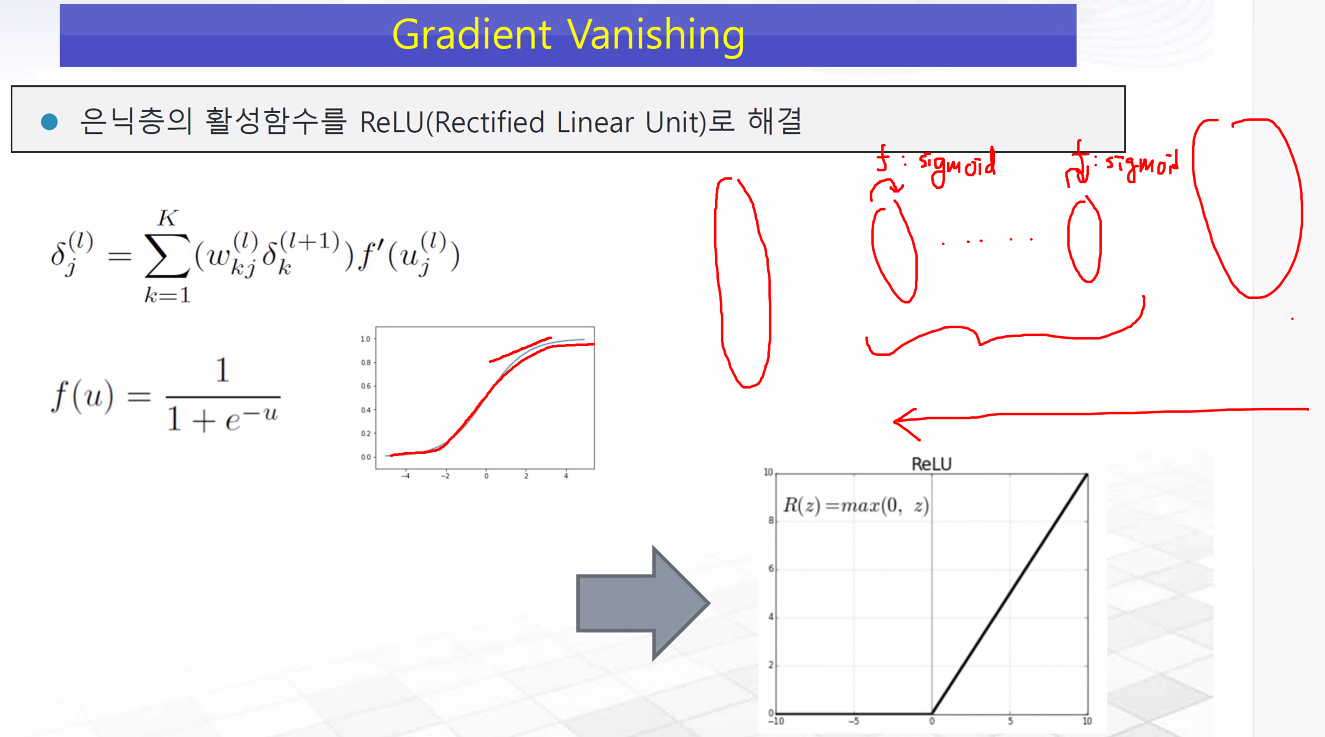

### 은닉층이 쌓이다보면 overfitting 이 생긴다 그과정에서 생긴문제에서 만든것을 해결하는 것이 
- 드랍아웃이다.

####

은닉층을 시그모이드를 하면 역전파 할때 앞쪽의 층에 학습이 잘안되어 ReLU를 이용하고
오버피팅 개선을 위해 하는것은 드랍아웃이다.

In [68]:
cancer = load_breast_cancer()
X = cancer["data"]
y = cancer["target"]

x_train,x_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=y)

minmax = MinMaxScaler()
x_train_scaled = minmax.fit_transform(x_train)
x_test_scaled = minmax.fit_transform(x_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


#### 다층 신경망
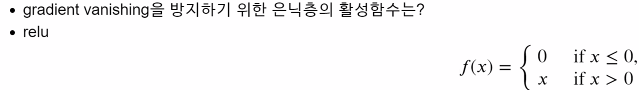

In [69]:
random.seed(42)

model_cancer = Sequential()
model_cancer.add(Dense(10,
                       # kernel_initializer= 'he_normal', # he_nomal
                       activation = "ReLU",
                       input_shape = (30, )),)

# model_cancer.add(Dense(32,activation = "ReLU",))
# model_cancer.add(Dense(64,activation = "ReLU",))
# model_cancer.add(Dense(128,activation = "ReLU",))
# model_cancer.add(Dense(256,activation = "ReLU",))
model_cancer.add(Dense(1,activation = "sigmoid",))

model_cancer.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                310       
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
adam = Adam(learning_rate=0.01)

model_cancer.compile(loss = "binary_crossentropy",
                     optimizer=adam,
                     metrics=["accuracy"])

cancer_history = model_cancer.fit(x_train_scaled, y_train,
                                    epochs=10,
                                    batch_size = 10,
                                    validation_split=0.2,
                                    verbose = "auto")

Epoch 1/10
37/37 [==============================] - 1s 5ms/step - loss: 0.5250 - accuracy: 0.8764 - val_loss: 0.3686 - val_accuracy: 0.9341
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 0.2974 - accuracy: 0.8929 - val_loss: 0.2369 - val_accuracy: 0.8901
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9093 - val_loss: 0.1731 - val_accuracy: 0.9451
Epoch 4/10
37/37 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 0.9231 - val_loss: 0.1482 - val_accuracy: 0.9670
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9423 - val_loss: 0.1661 - val_accuracy: 0.9451
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: 0.1554 - accuracy: 0.9368 - val_loss: 0.1265 - val_accuracy: 0.9670
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9615 - val_loss: 0.1022 - val_accuracy: 0.9670
Epoch 8/10
37/37 [==

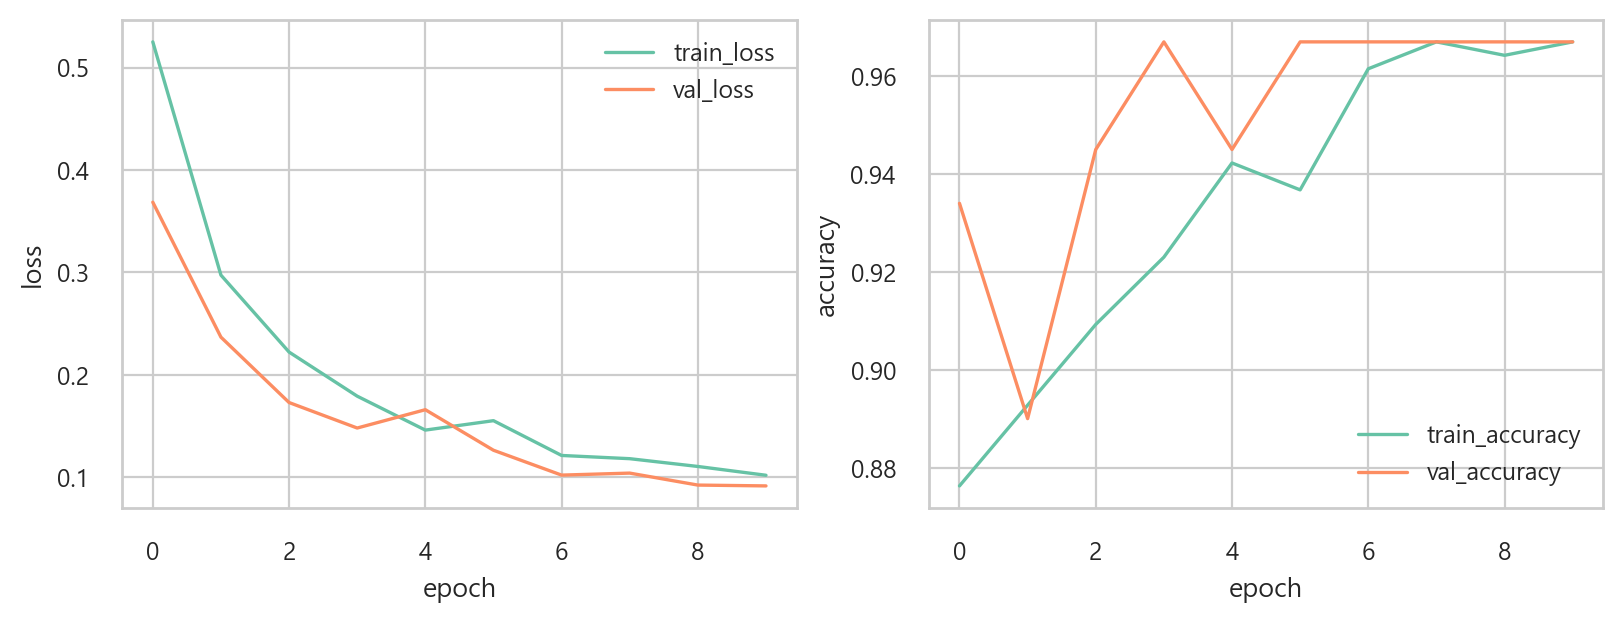

In [71]:
fig, ax = plt.subplots(1,2, figsize = (8,3))

ax[0].plot(cancer_history.history["loss"] , label = "train_loss")
ax[0].plot(cancer_history.history["val_loss"] , label = "val_loss")
ax[0].set(xlabel = "epoch", ylabel= "loss")
ax[0].legend()

ax[1].plot(cancer_history.history["accuracy"] , label = "train_accuracy")
ax[1].plot(cancer_history.history["val_accuracy"] , label = "val_accuracy")
ax[1].set(xlabel = "epoch", ylabel= "accuracy")
ax[1].legend();

### 평가

In [72]:
pred_cancer = model_cancer.predict(x_test_scaled).flatten() >=0.5
metrics.accuracy_score(pred_cancer, y_test)

4/4 [==============================] - 0s 1ms/step


0.9649122807017544

### 다중분류

In [73]:
digits = load_digits()
x_data = digits["images"]
y_data = digits["target"]

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=y_data)

x_train, x_test = x_train / x_train.max(), x_test / x_train.max()

In [74]:
x_train_re = x_train.reshape(x_train.shape[0], 64)
x_test_re = x_test.reshape(x_test.shape[0], 64)

In [75]:
print(x_train_re.shape)
print(y_train.shape)
print(x_test_re.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [76]:
y_train = to_categorical(y_train)

In [77]:
random.seed(42)

model_digits = Sequential()
model_digits.add(Dense(16,
                    #    kernel_initializer= 'he_normal', # he_nomal
                       activation = "ReLU",
                       input_shape = (64, )),)

model_digits.add(Dense(32,activation = "ReLU",))
# model_digits.add(Dense(64,activation = "ReLU",))
# model_digits.add(Dense(128,activation = "ReLU",))
# model_digits.add(Dense(64,activation = "ReLU",))
model_digits.add(Dense(10,activation = "softmax",))

model_digits.summary()

model_digits.compile()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 16)                1040      
                                                                 
 dense_32 (Dense)            (None, 32)                544       
                                                                 
 dense_33 (Dense)            (None, 10)                330       
                                                                 
Total params: 1914 (7.48 KB)
Trainable params: 1914 (7.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
adam = Adam(learning_rate=0.01)

model_digits.compile(loss = "categorical_crossentropy",
                     optimizer=adam,
                     metrics=["accuracy"])

digits_history = model_digits.fit(x_train_re, y_train,
                                    epochs=100,
                                    batch_size = 10,
                                    validation_split=0.2,
                                    verbose = "auto")


Epoch 1/100
115/115 [==============================] - 1s 3ms/step - loss: 1.0751 - accuracy: 0.6292 - val_loss: 0.4435 - val_accuracy: 0.8576
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.9034 - val_loss: 0.3319 - val_accuracy: 0.8889
Epoch 3/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9408 - val_loss: 0.2410 - val_accuracy: 0.9306
Epoch 4/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 0.9565 - val_loss: 0.2764 - val_accuracy: 0.9132
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9634 - val_loss: 0.3223 - val_accuracy: 0.8924
Epoch 6/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9678 - val_loss: 0.1677 - val_accuracy: 0.9410
Epoch 7/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9721 - val_loss: 0.2177 - val_accuracy: 0.9444

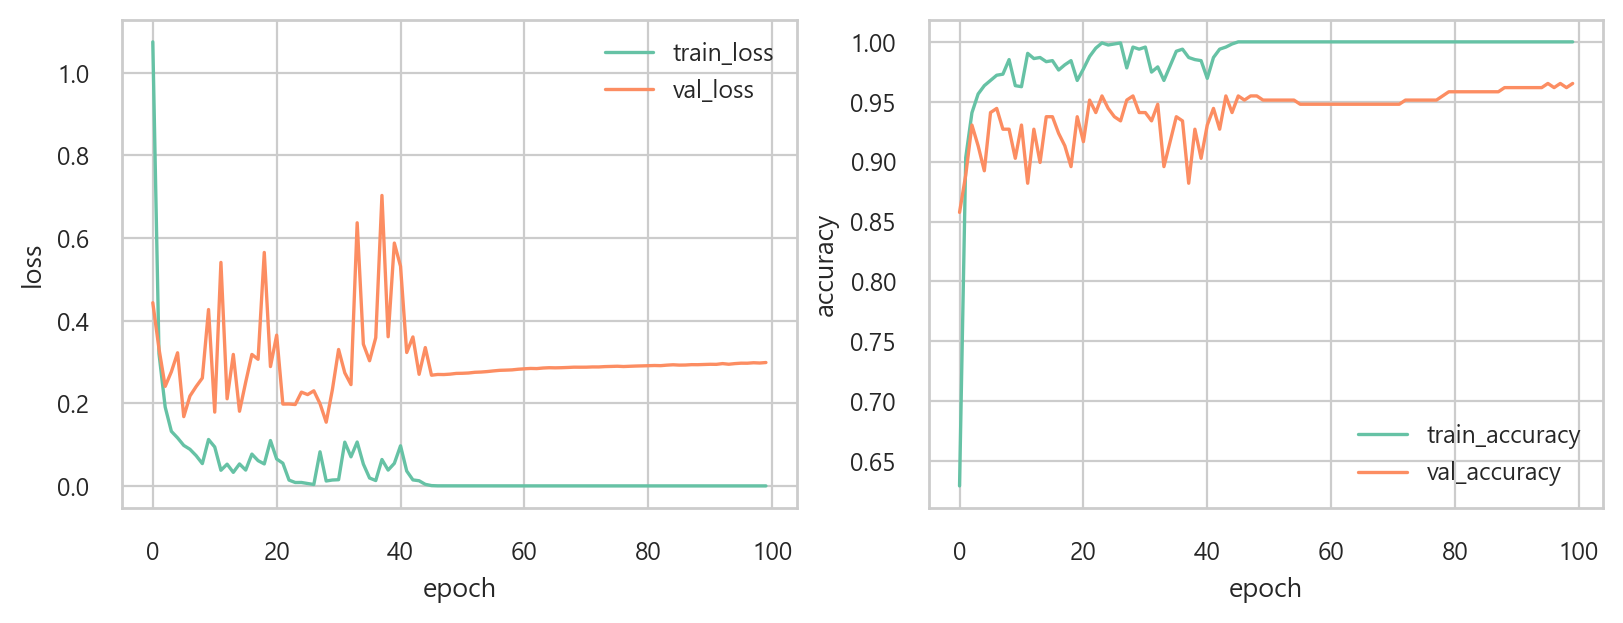

In [79]:
fig, ax = plt.subplots(1,2, figsize = (8,3))

ax[0].plot(digits_history.history["loss"] , label = "train_loss")
ax[0].plot(digits_history.history["val_loss"] , label = "val_loss")
ax[0].set(xlabel = "epoch", ylabel= "loss")
ax[0].legend()

ax[1].plot(digits_history.history["accuracy"] , label = "train_accuracy")
ax[1].plot(digits_history.history["val_accuracy"] , label = "val_accuracy")
ax[1].set(xlabel = "epoch", ylabel= "accuracy")
ax[1].legend();

### callback 하기

#### 체크포인트
1. 에포크 마다 저장
2. save bets only 통해 검증 데이터 에 대해 가장 정확도가 높은 모델 저장

In [80]:
random.seed(42)

model_digits = Sequential()
model_digits.add(Dense(16,
                    #    kernel_initializer= 'he_normal', # he_nomal
                       activation = "ReLU",
                       input_shape = (64, )),)

model_digits.add(Dense(32,activation = "ReLU",))
# model_digits.add(Dense(64,activation = "ReLU",))
# model_digits.add(Dense(128,activation = "ReLU",))
# model_digits.add(Dense(64,activation = "ReLU",))
model_digits.add(Dense(10,activation = "softmax",))

In [81]:
adam = Adam(learning_rate=0.01)

model_digits.compile(loss = "categorical_crossentropy",
                     optimizer=adam,
                     metrics=["accuracy"])

check_point = ModelCheckpoint("../model/digit_best.h5",
                              save_best_only=True)

digits_history = model_digits.fit(x_train_re, y_train,
                                    epochs=100,
                                    batch_size = 10,
                                    validation_split=0.2,
                                    callbacks= [check_point], # 검증에 대해서 정확도가 제일 좋은 것으로 저장
                                    verbose = "auto")


Epoch 1/100
115/115 [==============================] - 1s 2ms/step - loss: 1.0203 - accuracy: 0.6545 - val_loss: 0.4458 - val_accuracy: 0.8472
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8999 - val_loss: 0.2559 - val_accuracy: 0.9236
Epoch 3/100
  1/115 [..............................] - ETA: 0s - loss: 0.1610 - accuracy: 1.0000

c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


115/115 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9304 - val_loss: 0.2486 - val_accuracy: 0.9306
Epoch 4/100
115/115 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9661 - val_loss: 0.2135 - val_accuracy: 0.9375
Epoch 5/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.9652 - val_loss: 0.1786 - val_accuracy: 0.9410
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9634 - val_loss: 0.3954 - val_accuracy: 0.8924
Epoch 7/100
115/115 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.9591 - val_loss: 0.1992 - val_accuracy: 0.9306
Epoch 8/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9661 - val_loss: 0.2695 - val_accuracy: 0.9167
Epoch 9/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9695 - val_loss: 0.1966 - val_accuracy: 0.9375
Epoch 10/10

In [82]:
model = load_model("../model/digit_best.h5")

In [83]:
pred = [np.argmax(i) for i in model.predict(x_test_re)]
metrics.accuracy_score([np.argmax(i) for i in pred], y_test)

12/12 [==============================] - 0s 2ms/step


0.1

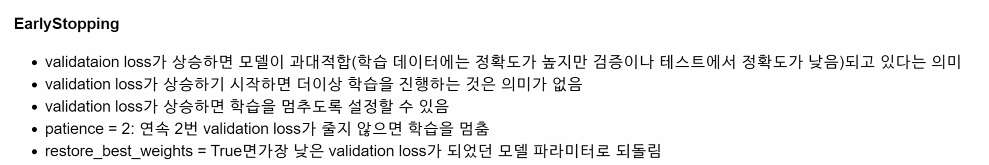

In [84]:
random.seed(42)

model_digits = Sequential()
model_digits.add(Dense(16,
                    #    kernel_initializer= 'he_normal', # he_nomal
                       activation = "ReLU",
                       input_shape = (64, )),)

model_digits.add(Dense(32,activation = "ReLU",))
# model_digits.add(Dense(64,activation = "ReLU",))
# model_digits.add(Dense(128,activation = "ReLU",))
# model_digits.add(Dense(64,activation = "ReLU",))
model_digits.add(Dense(10,activation = "softmax",))

In [85]:
adam = Adam(learning_rate=0.01)

model_digits.compile(loss = "categorical_crossentropy",
                     optimizer=adam,
                     metrics=["accuracy"])

check_point = ModelCheckpoint("../model/digit_best_2.h5",
                              save_best_only=True)

early_s = EarlyStopping(patience=2, # 보통 3 정도 
                        restore_best_weights=True)

digits_history = model_digits.fit(x_train_re, y_train,
                                    epochs=100,
                                    batch_size = 10,
                                    validation_split=0.2,
                                    callbacks= [check_point, early_s], # 검증에 대해서 정확도가 제일 좋은 것으로 저장
                                    verbose = "auto")


Epoch 1/100
115/115 [==============================] - 1s 4ms/step - loss: 1.0695 - accuracy: 0.6292 - val_loss: 0.5059 - val_accuracy: 0.8438
Epoch 2/100
 81/115 [====================>.........] - ETA: 0s - loss: 0.3749 - accuracy: 0.8827

c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


115/115 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8842 - val_loss: 0.3093 - val_accuracy: 0.8993
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9347 - val_loss: 0.2546 - val_accuracy: 0.9271
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9417 - val_loss: 0.3664 - val_accuracy: 0.8854
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9469 - val_loss: 0.3270 - val_accuracy: 0.8889


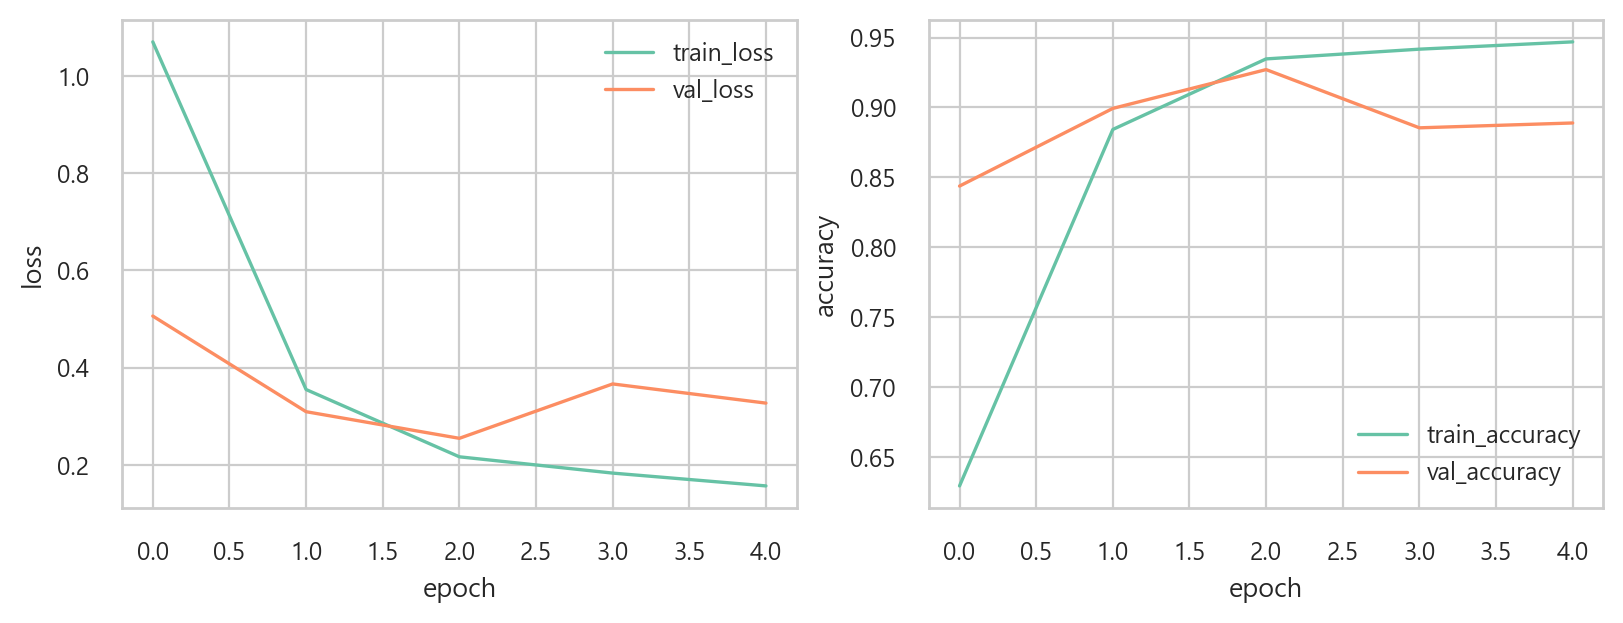

In [86]:
fig, ax = plt.subplots(1,2, figsize = (8,3))

ax[0].plot(digits_history.history["loss"] , label = "train_loss")
ax[0].plot(digits_history.history["val_loss"] , label = "val_loss")
ax[0].set(xlabel = "epoch", ylabel= "loss")
ax[0].legend()

ax[1].plot(digits_history.history["accuracy"] , label = "train_accuracy")
ax[1].plot(digits_history.history["val_accuracy"] , label = "val_accuracy")
ax[1].set(xlabel = "epoch", ylabel= "accuracy")
ax[1].legend();

### mnist

In [87]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [88]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [89]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

7

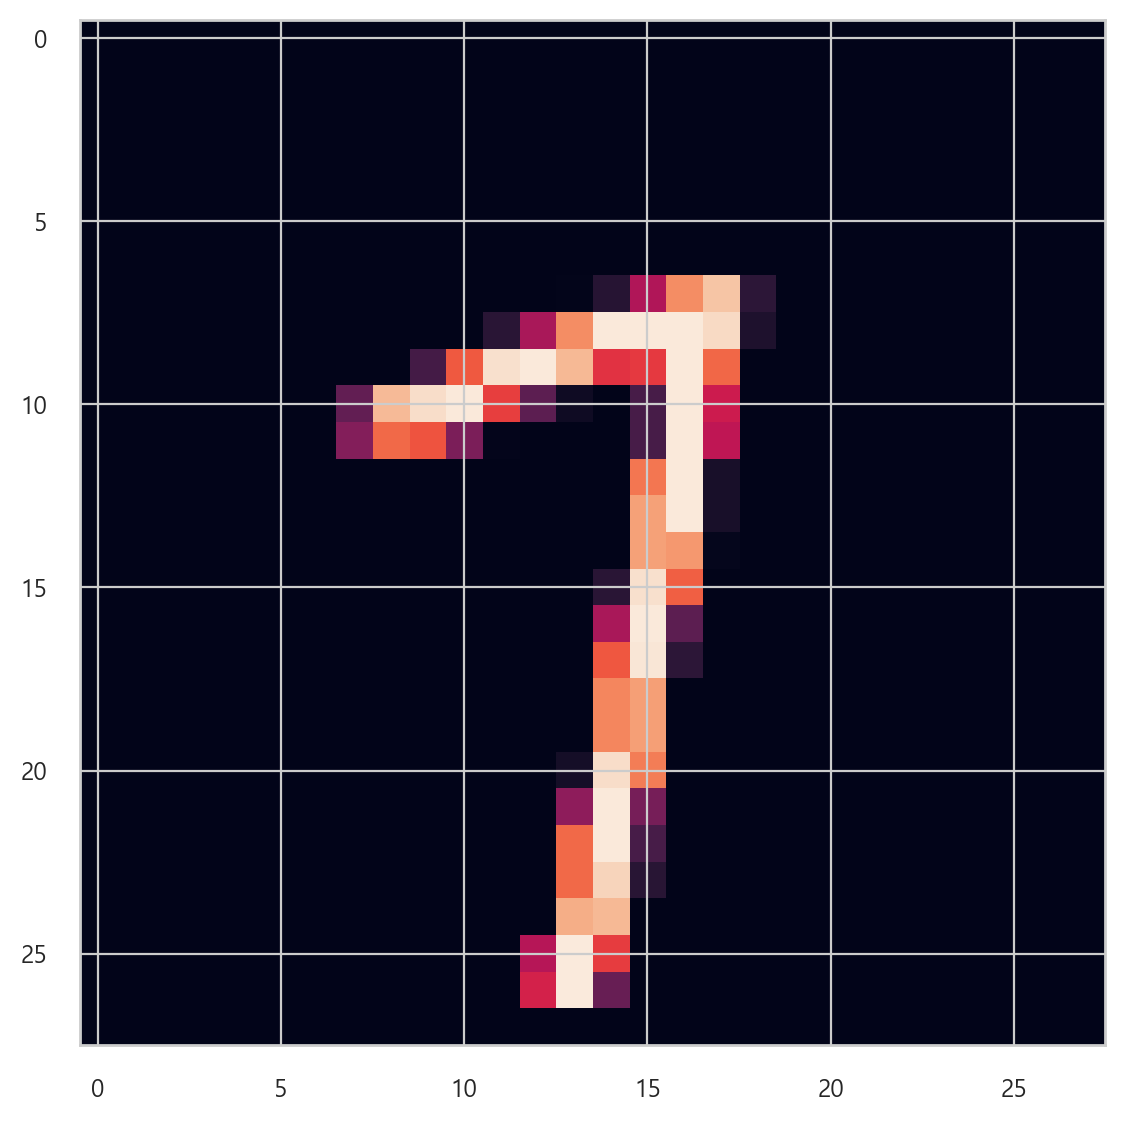

In [90]:
plt.imshow(x_train[42])
y_train[42]

### 전 처리

- 스케일링
- 카테고리 원핫
- 쉐입 변경

In [91]:
x_train, x_test = x_train / x_train.max(), x_test / x_train.max()

In [92]:
x_train_re = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test_re = np.reshape(x_test, (x_test.shape[0], 28*28))

In [93]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [94]:
y_train.shape

(60000, 10)

In [140]:
random.seed(42)

model_mnist = Sequential()

model_mnist.add(Dense(128, kernel_initializer='he_normal', activation='relu', input_shape=(28*28,)))
model_mnist.add(Dropout(0.3))
model_mnist.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
model_mnist.add(Dropout(0.3))
model_mnist.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
model_mnist.add(Dropout(0.3))
model_mnist.add(Dense(32, kernel_initializer='he_normal', activation='relu'))
model_mnist.add(Dropout(0.3))
model_mnist.add(Dense(10, activation='softmax'))

In [141]:
adam = Adam(learning_rate=0.001)

model_mnist.compile(loss = "categorical_crossentropy",
                     optimizer=adam,
                     metrics=["accuracy"])

# check_point = ModelCheckpoint("../model/digit_best_2.h5",
#                               save_best_only=True)

early_s = EarlyStopping(patience=3, # 보통 3 정도 
                        restore_best_weights=True)

digits_history = model_mnist.fit(x_train_re, y_train,
                                    epochs=50,
                                    batch_size = 1000,
                                    validation_split=0.2,
                                    callbacks= [early_s], # 검증에 대해서 정확도가 제일 좋은 것으로 저장
                                    verbose = "auto")


Epoch 1/50
48/48 [==============================] - 2s 16ms/step - loss: 1.8858 - accuracy: 0.3280 - val_loss: 0.9127 - val_accuracy: 0.7753
Epoch 2/50
48/48 [==============================] - 1s 11ms/step - loss: 0.9832 - accuracy: 0.6815 - val_loss: 0.3772 - val_accuracy: 0.9074
Epoch 3/50
48/48 [==============================] - 1s 11ms/step - loss: 0.6223 - accuracy: 0.8197 - val_loss: 0.2541 - val_accuracy: 0.9330
Epoch 4/50
48/48 [==============================] - 1s 11ms/step - loss: 0.4685 - accuracy: 0.8740 - val_loss: 0.2142 - val_accuracy: 0.9416
Epoch 5/50
48/48 [==============================] - 1s 13ms/step - loss: 0.3908 - accuracy: 0.8973 - val_loss: 0.1922 - val_accuracy: 0.9485
Epoch 6/50
48/48 [==============================] - 1s 11ms/step - loss: 0.3412 - accuracy: 0.9129 - val_loss: 0.1715 - val_accuracy: 0.9546
Epoch 7/50
48/48 [==============================] - 1s 11ms/step - loss: 0.3062 - accuracy: 0.9232 - val_loss: 0.1606 - val_accuracy: 0.9574
Epoch 8/50
48

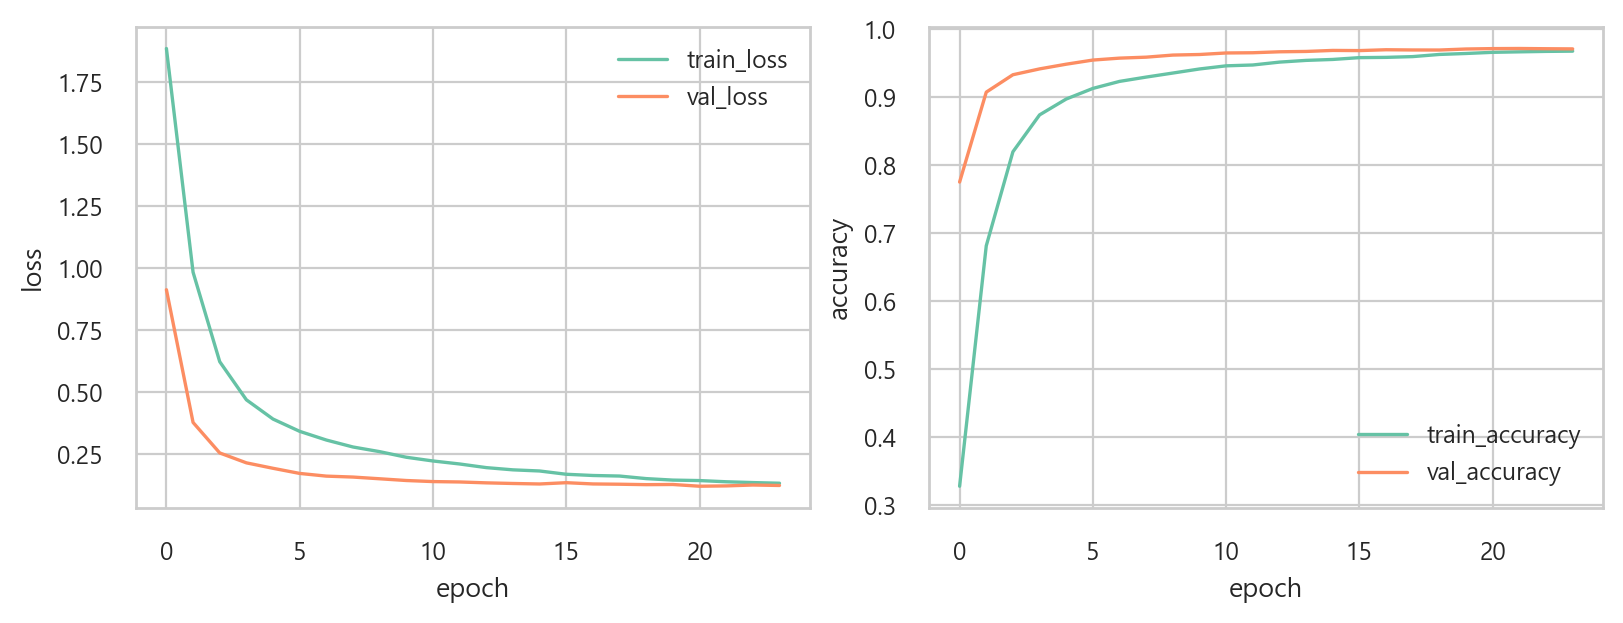

In [142]:
fig, ax = plt.subplots(1,2, figsize = (8,3))

ax[0].plot(digits_history.history["loss"] , label = "train_loss")
ax[0].plot(digits_history.history["val_loss"] , label = "val_loss")
ax[0].set(xlabel = "epoch", ylabel= "loss")
ax[0].legend()

ax[1].plot(digits_history.history["accuracy"] , label = "train_accuracy")
ax[1].plot(digits_history.history["val_accuracy"] , label = "val_accuracy")
ax[1].set(xlabel = "epoch", ylabel= "accuracy")
ax[1].legend();